# Aarav Gosalia

## Research question/interests
**Has there been a positive or negative change in literacy rates in previosly literate and non-literate countries and what could be the factors affecting it?**

Briefly describe your research question or interests here.

I will first filter out the countries which have only 1 year of data. Then I will check the first year of data collected for literacy number of different countries to classify them as previously literate or non-literate. Then I will plot two facetgrids containing literate and non-literate countries and compare literacy rates over the years and try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf
pd.options.mode.chained_assignment = None
sns.set_theme(style="ticks", font_scale=0.8)

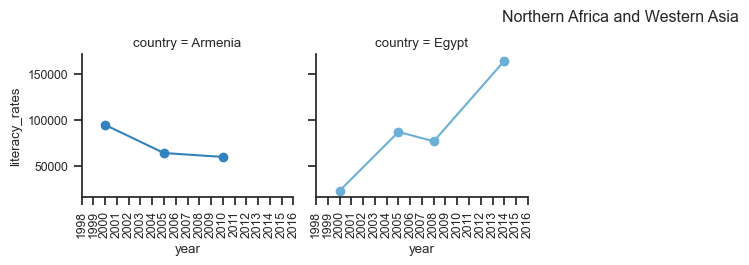

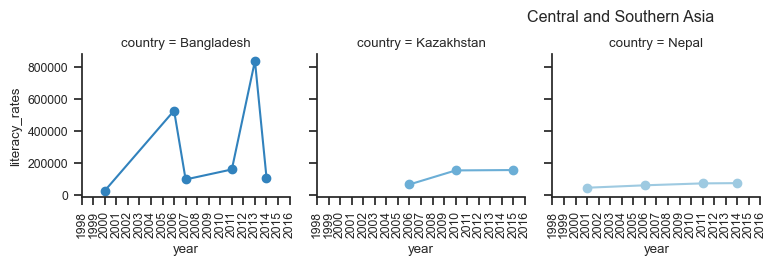

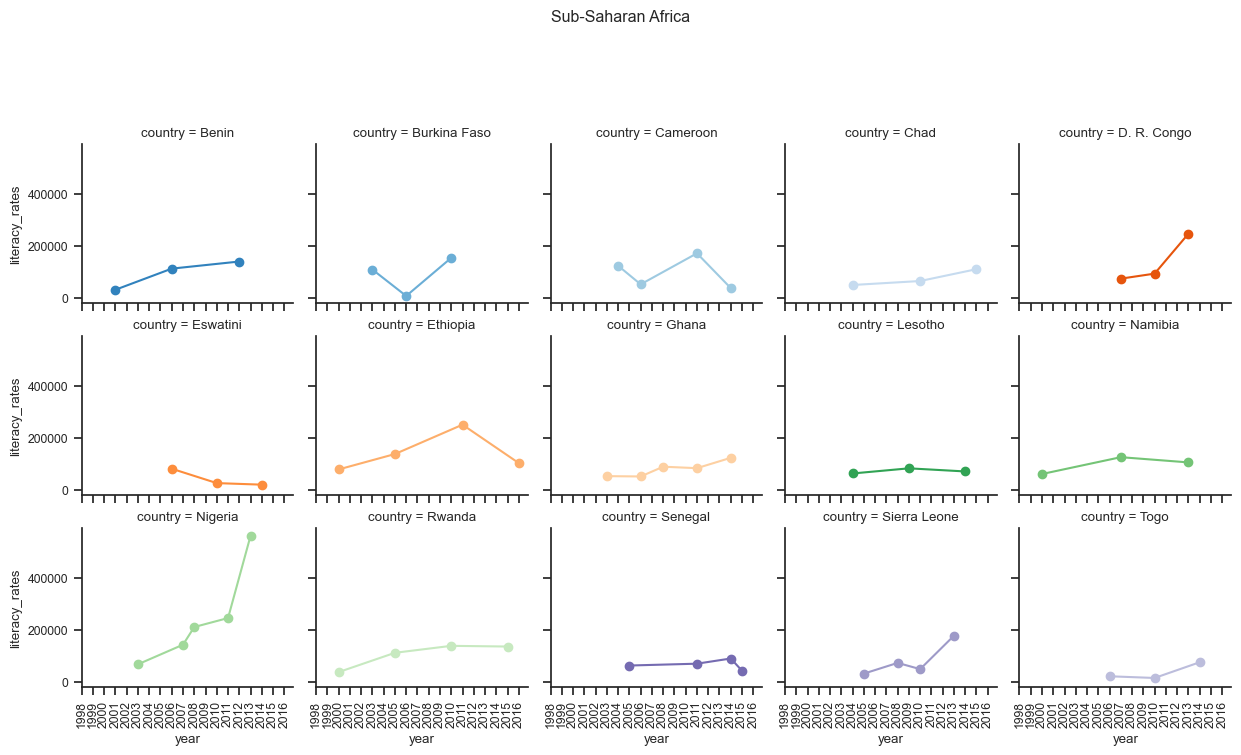

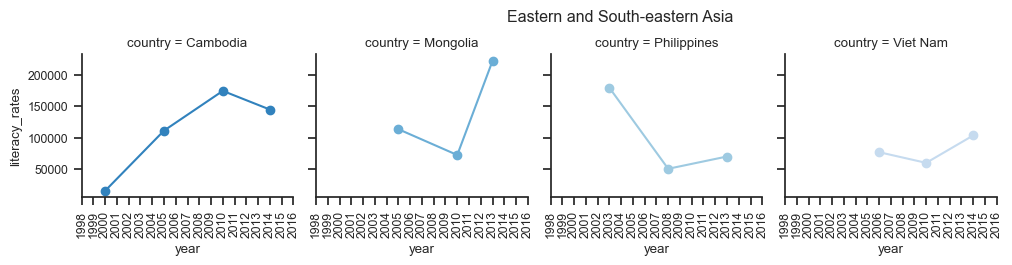

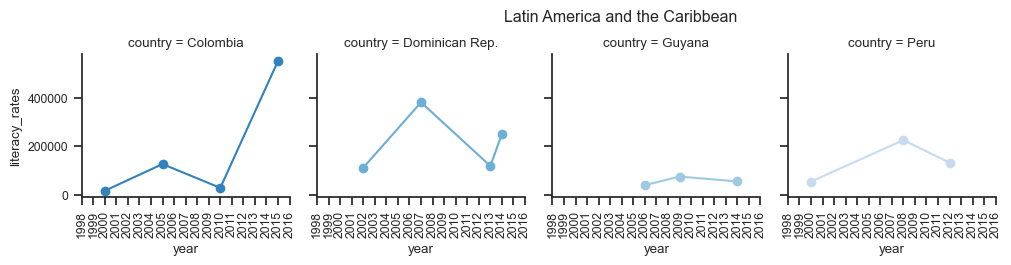

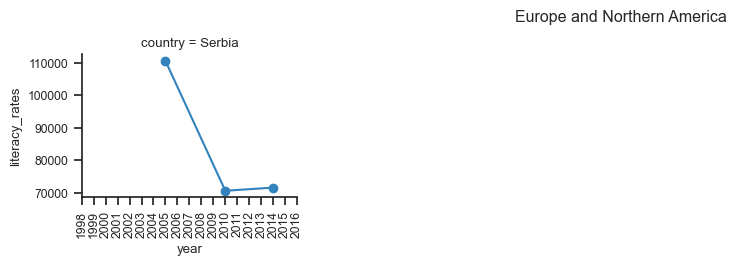

In [3]:
data_processed = pf.data_processing("../data/raw/dataset_raw.csv")
dictionary = pf.plotting(data_processed)
pf.lineplot(dictionary)

In [6]:
data_plot1,data_plot2 = pf.more_processing(dictionary)
pf.barplot1(data_plot1)

In [ ]:
pf.barplot2(data_plot2)

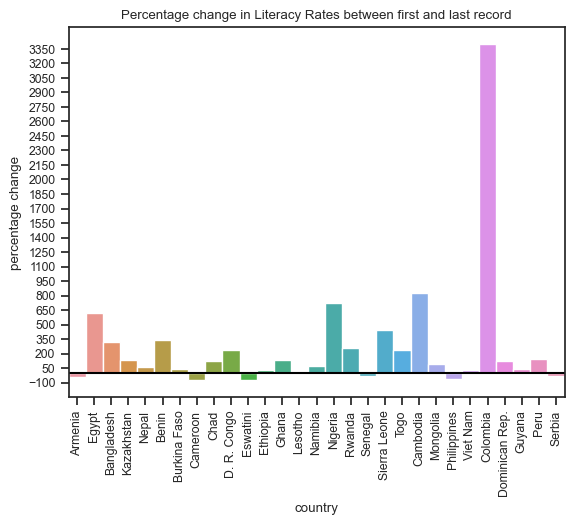

In [37]:
plot = sns.barplot(data = data_plot1, x="country", y="percentage change", width = 1)
plot.set(title= "Percentage change in Literacy Rates between first and last record", yticks= np.arange(-100,3500,150))
plot.set_xticklabels(data_plot1.country,rotation=90);
plot.axhline(color="black");

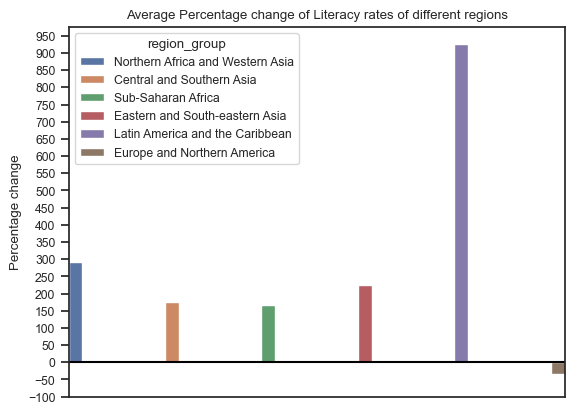

In [36]:
plot = sns.barplot(data = data_plot2, x="region_group", y="Average percentage change", hue = "region_group",width = 1)
plot.set(xticks=[], xlabel="", yticks=np.arange(-100,1000,50), ylabel="Percentage change", title = "Average Percentage change of Literacy rates of different regions");
plot.axhline(color="black");